# 导言区

In [62]:
import numpy as np
import scipy.constants as sc
from CoolProp.CoolProp import PropsSI as psi
from scipy.optimize import fsolve, root
import sympy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt

## 习题01-01

In [63]:
t = 20
P = 150
l = 5
w = 3
h = 2.5
tau = 10 * 3600
fluid = 'Air'

T = sc.convert_temperature(t, 'C', 'K')
p = sc.atm
rho = psi('D', 'T', T, 'P', p, fluid)
V = l * w * h
m = rho * V
Q = P * tau
h_1 = psi('H', 'T', T, 'P', p, fluid)
H_1 = m * h_1
H_2 = H_1 + Q
h_2 = H_2 / m
T_2 = psi('T', 'H', h_2, 'P', p, fluid)
t_2 = sc.convert_temperature(T_2, 'K', 'C')
print(f'房间的平均温度为：{t_2:.2f} C')

房间的平均温度为：138.37 C


## 习题01-02

In [64]:
A_2 = 60e-4
p_1 = 100e3
t_1 = 25
t_2 = 47
P = 1500
fluid = 'Air'

T_1 = sc.convert_temperature(t_1, 'C', 'K')
T_2 = sc.convert_temperature(t_2, 'C', 'K')
h_1 = psi('H', 'T', T_1, 'P', p_1, fluid)
h_2 = psi('H', 'T', T_2, 'P', p_1, fluid)
m_dot = P / (h_2 - h_1)
rho_2 = psi('D', 'T', T_2, 'P', p_1, fluid)
q_v_2 = m_dot / rho_2
v_2 = q_v_2 / A_2
print(f"空气的质量流量为：{m_dot:.3f} kg/s，出口处的空气流速为：{v_2:.2f} m/s")

空气的质量流量为：0.068 kg/s，出口处的空气流速为：10.37 m/s


## 习题01-03

In [65]:
fluid = 'Water'
q_v = 1000e-6/60
t_0 = 15
t_1 = 43
t_2 = 38
t_3 = 27
tau = 15*60

T_0, T_1, T_2, T_3 = sc.convert_temperature([t_0, t_1, t_2, t_3], 'C', 'K')
p = sc.atm
rho = psi('D', 'T', T_1, 'P', p, fluid)
q_m = q_v*rho
h_1 = psi('H', 'T', T_1, 'P', p, fluid)
h_0 = psi('H', 'T', T_0, 'P', p, fluid)
Q_1 = q_m*(h_1-h_0)
h_3 = psi('H', 'T', T_3, 'P', p, fluid)
Q_2 = q_m*(h_1-h_3)
ratio = (Q_1 - Q_2)/Q_1
saved_energy = q_m*(h_1 - h_3) * tau
print(f'可以节省{saved_energy:.2f} J, 约为{saved_energy/(sc.hour * sc.kilo):.2f}度电')

可以节省994103.89 J, 约为0.28度电


## 习题01-09

In [66]:
A = 12
delta = 260e-3
lambda_ = 1.5
t_i = 25
t_o = -5

Q = A * lambda_ * (t_i - t_o) / delta
print(f'此砖墙向外界散失的热量为{Q:.2f} J')

此砖墙向外界散失的热量为2076.92 J


## 习题01-10

In [67]:
delta = 13e-2
A = 20
lambda_ = 1.04
t_i = 520
t_o = 50
q = 2.09e4*1e3
tau = 1 * sc.day
Q = A * lambda_ * (t_i - t_o) / delta
m = Q * tau / q
print(f'每天因热损失要用掉{m:.2f} kg煤')

每天因热损失要用掉310.87 kg煤


## 习题01-11

In [68]:
delta = 40e-3
q = 15
t_o = 40
t_i = 30

lambda_ = q * delta / (t_o - t_i)
print(f'导热系数为：{lambda_} W/m-K')

导热系数为：0.06 W/m-K


## 习题01-12

In [69]:
t_w = 69
t_f = 20
d = 14e-3
l = 80e-3
P = 8.5

A = np.pi * d * l
h = P / (A * (t_w - t_f))
print(f'对流传热表面传热系数为：{h:.2f} W/(m^2-K)')

对流传热表面传热系数为：49.30 W/(m^2-K)


## 习题01-13

In [70]:
p = 1.013e5
P = 50
d = 4e-3
l = 10e-2
t_s = 109
fluid = 'Water'

T = psi('T', 'P', p, 'Q', 0, fluid)
t = sc.convert_temperature(T, 'K', 'C')


A = np.pi * d * l
h = P / (A * (t_s - t))
print(f'对流传热表面传热系数为：{h:.2f} W/(m^2-K)')

对流传热表面传热系数为：4405.01 W/(m^2-K)


## 习题01-14

In [71]:
a = b = 10e-3
t_a = 20
t_max = 85
h = 175
delta = 1e-3

A = a * b + 2 * delta * a + 2 * delta * b
Q = h * A * (t_max - t_a)
print(f'不考虑辐射时，芯片的最大允许功率为：{Q:.2f} W')

不考虑辐射时，芯片的最大允许功率为：1.59 W


## 习题01-15

In [72]:
a = b = 10e-3
t_a = 20
t_max = 85
h = 175
delta = 1e-3

A = a * b + 2 * delta * a + 2 * delta * b
Q = h * A * (t_max - t_a)
print(f'不考虑辐射时，芯片的最大允许功率为：{Q:.2f} W')

不考虑辐射时，芯片的最大允许功率为：1.59 W


## 习题01-16

In [73]:
d = 25e-2
height = 175e-2
t = 30
h_1 = 15
t_a = 20
h_2 = 50

A = np.pi * d**2 / 4 + np.pi * d * height
Q_1 = h_1 * A * (t - t_a)
Q_2 = h_2 * A * (t - t_a)

guess_t_a2 = 25
t_a2 = fsolve(lambda t_a2: h_1 * (t - t_a2) - h_2 * (t - t_a), guess_t_a2)[0]
print(f'人体的散热量为：{Q_1:.2f} J')
print(f'有风的日子，人体的散热量为：{Q_2:.2f} J')
print(f'此时风冷温度为：{t_a2:.2f} C')

人体的散热量为：213.53 J
有风的日子，人体的散热量为：711.77 J
此时风冷温度为：-3.33 C


## 习题01-17

In [74]:
T_a = 2.7
T = 250
epsilon = 0.7
q = epsilon * sc.sigma * (T ** 4 - T_a ** 4)
print(f'航天器单位表面积的换热量为：{q:.2f} W/m^2')

航天器单位表面积的换热量为：155.05 W/m^2


## 习题01-19

In [75]:
a = b = 10e-3
t_s = 20
t_max = 85
h = 175
delta = 1e-3

epsilon = 0.9

A = a * b + 2 * delta * a + 2 * delta * b
T_max = sc.convert_temperature(t_max, 'C', 'K')
T_s = sc.convert_temperature(t_s, 'C', 'K')
Q_conv = h * A * (T_max - T_s)
Q_radi = epsilon * sc.sigma * A * (T_max ** 4 - T_s**4)
Q = Q_conv + Q_radi
print(f'芯片的最大允许功率为：{Q:.2f} W')

芯片的最大允许功率为：1.66 W


## 习题01-20

In [76]:
r = 0.5
epsilon = 0.8
Q = 175
T_a = 2.7

A = 4 * sc.pi * r ** 2

guess_T = T_a + 100
T = fsolve(lambda T: Q - epsilon * sc.sigma * (T**4 - T_a**4), guess_T)[0]
print(f'其外表面温度为{T:.2f} K')

其外表面温度为249.22 K


## 习题01-21

In [77]:
h_1 = 95
delta = 2.5e-3
lambda_ = 46.5
h_2 = 5800

R_1 = 1 / h_1
R_2 = 1 / h_2
R_3 = delta / lambda_

print(f'R_1 = {R_1:.2e} m^2-K/W, R_2 = {R_2:.2e} m^2-K/W, R_3 = {R_3:.2e} m^2-K/W')

R = R_1 + R_2 + R_3
h = 1 / R
print(f'h = {h:.2f} W/(m^2-K)')

position = {R_1: '气侧', R_2: '热壁', R_3: '水侧'}
max_resistance_position = position[max(position.keys())]
print(f'为了强化这一传热过程，应首先从{max_resistance_position}环节着手')

R_1 = 1.05e-02 m^2-K/W, R_2 = 1.72e-04 m^2-K/W, R_3 = 5.38e-05 m^2-K/W
h = 93.00 W/(m^2-K)
为了强化这一传热过程，应首先从气侧环节着手


## 习题01-22

In [78]:
h_1 = 95
delta = 2.5e-3
lambda_ = 46.5
h_2 = 5800

delta2 = 2e-3
lambda_2 = 0.116
delta3 = 1e-3
lambda_3 = 1.15

R_1 = 1 / h_1
R_2 = 1 / h_2
R_3 = delta / lambda_
R_4 = delta2 / lambda_2
R_5 = delta3 / lambda_3

R = R_1 + R_2 + R_3 + R_4 + R_5
h = 1 / R
print(f'h = {h:.2f} W/(m^2-W)')

h = 34.65 W/(m^2-W)


## 习题01-24

In [79]:
t_w1 = 460
t_f2 = 300
delta_1 = 5e-3
delta_2 = 0.5e-3
lambda_1 = 46.5
lambda_2 = 1.16
h_2 = 5800

R_1 = delta_1 / lambda_1
R_2 = delta_2 / lambda_2
R_3 = 1 / h_2
R = R_1 + R_2 + R_3
q = (t_w1 - t_f2) / R
print(f'单位面积传递的热量为{q:.2f} W/m^2')

单位面积传递的热量为225043.02 W/m^2


## 习题01-26

In [80]:
A = 12
t_eva = 0
t_i = 9.7
t_o = 5
Q = 6900

delta_T = np.average([t_i, t_o]) - t_eva
h = Q / (A * delta_T)
print(f'总传热系数为：{h:.2f} W/m^2-K')

总传热系数为：78.23 W/m^2-K


## 习题01-30

In [81]:
t_h, t_c = 20, 0
delta = 0.08
t_f1 = 100
h_1 = 200

q = h_1 * (t_f1 - t_h)
lambda_ = (q * delta) / (t_h - t_c)
print(f"导热系数为：{lambda_} W/m-K")

导热系数为：64.0 W/m-K


## 习题01-31

In [82]:
delta = 0.1
lambda_ = 17.5
t_w1 = 27
t_w2 = 127

T_w1 = sc.convert_temperature(t_w1, 'C', 'K')
T_w2 = sc.convert_temperature(t_w2, 'C', 'K')
q = sc.sigma * (T_w2**4 - T_w1**4)
t_w3 = t_w2 + q * delta / lambda_
print(f"t_w3 = {t_w3:.2f} C")

t_w3 = 132.68 C


## 习题01-32

In [83]:
a = 60e-2
b = 30e-2
delta = 4e-3
t_in = 20
t_out = -20
h_in = 10
h_out = 50
lambda_ = 0.78

R_1 = 1 / h_in
R_2 = delta / lambda_
R_3 = 1 / h_out
R = R_1 + R_2 + R_3
A = a * b
Q = (t_in - t_out) / R * A
print(f'通过玻璃的热损失为：{Q:.2f} W')

通过玻璃的热损失为：57.54 W


## 习题01-33

In [84]:
delta = 200e-3
h = 3
w = 6
t_in = 2
t_out = -10
h_in = 6
ratio_list = [1, 0.5, 0.25]
h_out_base = 60
h_out = h_out_base * np.array(ratio_list)
lambda_ = 0.044

R_1 = 1 / h_in
R_2 = delta / lambda_
R_3 = 1 / h_out
R = R_1 + R_2 + R_3
A = h * w
Q = A * (t_in - t_out) / R
for ratio, Q_ in zip(ratio_list, Q):
    print(f'当风速减小为原来的{ratio:.0%}时，散热量为{Q_:.2f} W')

当风速减小为原来的100%时，散热量为45.68 W
当风速减小为原来的50%时，散热量为45.52 W
当风速减小为原来的25%时，散热量为45.20 W


## 习题01-34

In [85]:
fluid1 = 'R22'
fluid2 = 'Air'
T_f = 313
T_a = 283
A_air = 0.4
v_air = 2
q_m = 0.011
h = 40

gamma = psi('H', 'T', T_f, 'Q', 1, fluid1) - psi('H', 'T', T_f, 'Q', 0, fluid1)
Q = q_m * gamma
h_in_air = psi('H', 'T', T_a, 'P', sc.atm, fluid2)
density_air = psi('D', 'T', T_a, 'P', sc.atm, fluid2)
m_dot_air = v_air * A_air * density_air
h_out_air = Q / m_dot_air + h_in_air
T_out_air = psi('T', 'H', h_out_air, 'P', sc.atm, fluid2)
T_air_average = (T_out_air + T_a) / 2
A = Q / h / (T_f - T_air_average)
print(f"所需的传热面积为：{A:.2f} m^2")

所需的传热面积为：1.58 m^2


## 习题01-35

In [86]:
A = 0.2
t = 65
t_a = 25
Q = 1000

h = Q / (A * (t - t_a))
print(f'所需的对流传热系数为：{h:.2f} W/m^2-K')

t_s = 30
epsilon = 0.85
T_s = sc.convert_temperature(t_s, 'C', 'K')
T_a = sc.convert_temperature(t_a, 'C', 'K')
Q_radiation = epsilon * sc.sigma * A * (T_s**4 - T_a**4)
print(f'热辐射带走的热量为：{Q_radiation:.2f} W')

所需的对流传热系数为：125.00 W/m^2-K
热辐射带走的热量为：5.24 W


## 习题01-36

In [87]:
A_i = 200e-6
t_fi = 700
h_i = 320
A_o = 2840e-6
t_f = 1000
h_o = 1420
t_o = 820
t_i = 790

Q_in = h_i * (t_i - t_fi) * A_i
Q_out = h_o * (t_f - t_o) * A_o
if abs(Q_in - Q_out) < 0.05 * min(Q_in, Q_out):
    print("叶片的导热处于稳态")
else:
    print("叶子的导热处于非稳态")

叶子的导热处于非稳态


## 习题01-37

In [88]:
A_out = 3
t_out = 0
epsilon = 0.05
t_a = -100

T_out = sc.convert_temperature(t_out, 'C', 'K')
T_a = sc.convert_temperature(t_a, 'C', 'K')

Q = epsilon * sc.sigma * A_out * (T_out**4 - T_a**4)
print(f'模拟仓表面的辐射散热量为：{Q:.2f} W')
print(f'这份能量不都是宇航员身上散失的，还有部分是舱内仪表散失的')

模拟仓表面的辐射散热量为：39.70 W
这份能量不都是宇航员身上散失的，还有部分是舱内仪表散失的


## 习题01-38

In [89]:
print('该男子向环境散热的方式有对流和辐射')

epsilon = 0.9
t_initial = 31
t_amb = 10
h = 20
d = 0.318
height = 1.7

T_initial = sc.convert_temperature(t_initial, 'C', 'K')
T_amb = sc.convert_temperature(t_amb, 'C', 'K')
A = np.pi * d**2 / 4 + np.pi * d * height

Phi_1 = 400
# Phi_2 = 800
C = 5e5
tau = 1 * sc.hour

# Phi = Phi_2 - Phi_1
# Delta_T = Phi / C * tau
# T_final = T_initial - Delta_T

T, Q_rad, Q_conv = sp.Symbol('T'), sp.Symbol('Q_rad'), sp.Symbol('Q_conv')
Q_rad = epsilon * sc.sigma * A * (T**4 - T_amb**4)
Q_conv = h * A * (T - T_amb)
dQ_dtau = Q_rad + Q_conv - Phi_1
dQ_dT = C
dtau_dT = dQ_dT / dQ_dtau

dQrad_dT = sp.lambdify(T, -Q_rad * dtau_dT, 'numpy')
dQconv_dT = sp.lambdify(T, -Q_conv * dtau_dT, 'numpy')


def expressions(p):
    Q_rad_total, Q_conv_total, T_final = p
    exp1 = Q_rad_total - quad(dQrad_dT, T_initial, T_final)[0]
    exp2 = Q_conv_total - quad(dQconv_dT, T_initial, T_final)[0]
    exp3 = (Q_rad_total + Q_conv_total - Phi_1 * tau) - C * (T_initial - T_final)
    return [exp1, exp2, exp3]
# Q_rad_total = sp.integrate(-Q_rad * dtau_dT, (T, T_initial, T_final))
# Q_conv_total = sp.integrate(-Q_conv * dtau_dT, (T, T_initial, T_final))


guess_value = [1e6, 1e6, T_initial - 4]
Q_rad_total, Q_conv_total, T_final = root(expressions, guess_value).x

print(f'辐射总换热量为： {Q_rad_total:.0f} J')
print(f'对流总换热量为： {Q_conv_total:.0f} J')

该男子向环境散热的方式有对流和辐射
辐射总换热量为： 632095 J
对流总换热量为： 2464378 J


## 习题01-41

当传热系数为10 W/m^2-K 时，散热量为44.89 W
当传热系数为15 W/m^2-K 时，散热量为45.20 W
当传热系数为25 W/m^2-K 时，散热量为45.45 W
当传热系数为32 W/m^2-K 时，散热量为45.54 W
当传热系数为45 W/m^2-K 时，散热量为45.62 W
当传热系数为60 W/m^2-K 时，散热量为45.68 W


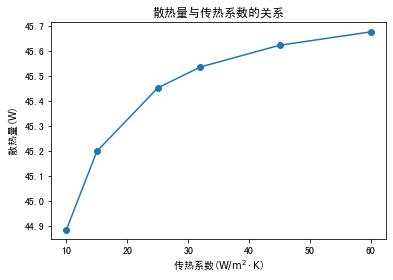

In [94]:
delta = 200e-3
h = 3
w = 6
t_in = 2
t_out = -10
h_in = 6
# ratio_list = [1, 0.5, 0.25]
# h_out_base = 60
h_out = np.array([10, 15, 25, 32, 45, 60])
lambda_ = 0.044

R_1 = 1 / h_in
R_2 = delta / lambda_
R_3 = 1 / h_out
R = R_1 + R_2 + R_3
A = h * w
Q = A * (t_in - t_out) / R
for h, Q_ in zip(h_out, Q):
    print(f'当传热系数为{h} W/m^2-K 时，散热量为{Q_:.2f} W')
fig, ax = plt.subplots()
ax.plot(h_out, Q, 'o-')
ax.set_xlabel('传热系数($\mathrm{W/m^2\cdot K}$)')
ax.set_ylabel('散热量($\mathrm{W}$)')
ax.set_title('散热量与传热系数的关系')
plt.show()


## 习题01-42

In [93]:
Q = 1200    # 电熨斗的功率，课本缺失
A = 300e-4
epsilon = 0.9
t_a = 25
h = 39

T_a = sc.convert_temperature(t_a, 'C', 'K')


def expressions(p):
    Q_rad, Q_conv, T = p
    exp1 = Q_rad - epsilon * sc.sigma * A * (T**4 - T_a**4)
    exp2 = Q_conv - h * A * (T - T_a)
    exp3 = Q_rad + Q_conv - Q
    return [exp1, exp2, exp3]


guess_value = [Q/2, Q/2, T_a + 10]
Q_rad, Q_conv, T = root(expressions, guess_value).x
t = sc.convert_temperature(T, 'K', 'C')
print(f'T = {T:.2f} K')
print(f't = {t:.2f} C')

$T = 799.50 K$
$t = 526.35 C$
